# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [ ]:
data.isnull().any()
#пропуски есть в столбцах keyword и location

id          False
keyword      True
location     True
text        False
target      False
dtype: bool

In [ ]:
#заполним пропуски пустыми строками 
data = data.fillna(' ')
data.head()

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' are ...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1


## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, random_state=42)

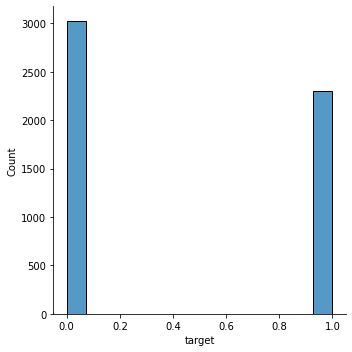

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.displot(train['target'])
plt.show()

Скорее всего график не тот, который нужен, но я вообще не поняла, что хотели в этом пункте. По графику выше можно сделать выводы только о том, что таргета со значением 0 больше, чем со значением 1 с: Кстати, смайлики могут быть и с буквами, а не скобочками, хехехе

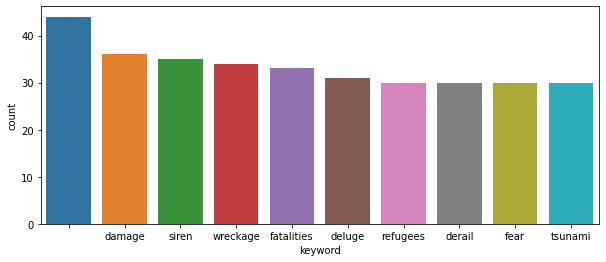

In [ ]:
most_freq = train['keyword'].value_counts()[:10].index
plt.figure(figsize = (10, 4))
sns.countplot(x = train['keyword'][train['keyword'].isin(most_freq)], order = most_freq)

В зависимости от разных значений keyword количество классов не сильно различается.

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [ ]:
data['combined'] = data['keyword'].astype(str)+' '+ data['location'].astype(str) + ' ' + data['text'].astype(str)

In [ ]:
data = data.drop('id', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
data.head(11)

,keyword,location,text,target,combined
0,,,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthqua...
1,,,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,,,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' ...
3,,,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuatio..."
4,,,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska...
5,,,#RockyFire Update => California Hwy. 20 closed...,1,#RockyFire Update => California Hwy. 20 cl...
6,,,#flood #disaster Heavy rain causes flash flood...,1,#flood #disaster Heavy rain causes flash f...
7,,,I'm on top of the hill and I can see a fire in...,1,I'm on top of the hill and I can see a fir...
8,,,There's an emergency evacuation happening now ...,1,There's an emergency evacuation happening ...
9,,,I'm afraid that the tornado is coming to our a...,1,I'm afraid that the tornado is coming to o...


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, random_state=42)
# Разделим на трейн и тест снова, чтобы использовать сконкатенированный столбец

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
X = np.array(cnt_vec.fit_transform(train['combined']))
X
#матрица вышла 5329 на 18455, элементов всего 86671



array(<5329x18455 sparse matrix of type '<class 'numpy.int64'>'
	with 86671 stored elements in Compressed Sparse Row format>, dtype=object)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [ ]:
cnt_vec.vocabulary_

{'bridge': 2948,
 '20collapse': 320,
 'ashes': 1928,
 '2015': 295,
 'australia': 2059,
 'ûªs': 18425,
 'collapse': 3914,
 'at': 1977,
 'trent': 16483,
 'among': 1628,
 'worst': 17813,
 'in': 8314,
 'history': 7773,
 'england': 5722,
 'bundled': 3085,
 'out': 11995,
 'for': 6503,
 '60': 755,
 'http': 7970,
 'co': 3861,
 't5trhjuau0': 15733,
 'hail': 7420,
 'carol': 3363,
 'stream': 15419,
 'illinois': 8249,
 'great': 7206,
 'michigan': 10594,
 'technique': 15888,
 'camp': 3261,
 'b1g': 2147,
 'thanks': 16013,
 'to': 16272,
 'bmurph1019': 2753,
 'hail_youtsey': 7421,
 'termn8r13': 15949,
 'goblue': 7088,
 'wrestleon': 17848,
 'oaskgki6qj': 11648,
 'police': 12634,
 'houston': 7933,
 'cnn': 3854,
 'tennessee': 15932,
 'movie': 10940,
 'theater': 16025,
 'shooting': 14647,
 'suspect': 15632,
 'killed': 9246,
 'by': 3150,
 'di8elzswnr': 4890,
 'rioting': 13800,
 'still': 15357,
 'couple': 4204,
 'of': 11708,
 'hours': 7925,
 'left': 9644,
 'until': 16884,
 'have': 7546,
 'be': 2383,
 'up': 

In [ ]:
# Выведем список символов пунктуации, чтобы использовать его в функции
from string import punctuation as punct
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [448]:
import re
def search_for_tokens(cnt_vec):
  words_with_num = 0 #счетчик слов с цифрами
  words_with_punct = 0 #счетчик слов с пунктуацией
  words_with_ha = 0 #счетчик слов с хэштегами в начале
  for word in cnt_vec.vocabulary_.keys():
    are_there_punct = [char in punct for char in word] # условие для пунктуации в слове, итерируемся по символам в слове
    if re.search(r'\d+', str(word)) is not None:
      words_with_num += 1
    if any(are_there_punct):
      words_with_punct += 1
    if re.search(r'\#\w+', word) is not None or re.search(r'\@\w+', word) is not None:
      words_with_ha += 1
  return ('Слова с цифрами в составе :', words_with_num, 'Слова с пунктуацией в составе :', words_with_punct, 'Слова с # или @ в начале :', words_with_ha)
search_for_tokens(cnt_vec)

('Слова с цифрами в составе :',
 3812,
 'Слова с пунктуацией в составе :',
 315,
 'Слова с # или @ в начале :',
 0)

Скорее всего такой результат обусловлен  CountVectorizerом, который мог убрать слова с хэштегом или собакой в начале.

## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [ ]:
from nltk.tokenize import TweetTokenizer
tw = TweetTokenizer()
tw_vec = CountVectorizer(ngram_range = (1, 1), tokenizer = TweetTokenizer().tokenize)
Y = tw_vec.fit_transform(train['combined'])
f = tw_vec.vocabulary_.keys()
s = list(f)

In [ ]:
import re
def search_for_tokens_2(text):
  words_with_num = 0
  words_with_punct = 0
  words_with_ha = 0
  for word in text:
    are_there_punct = [char in punct for char in word]
    if re.search(r'\d+', str(word)) is not None:
      words_with_num += 1
    if any(are_there_punct):
      words_with_punct += 1
    if re.search(r'\#\w+', word) is not None or re.search(r'\@\w+', word) is not None:
      words_with_ha += 1
  return ('Слова с цифрами в составе :', words_with_num, 'Слова с пунктуацией в составе :', words_with_punct, 'Слова с # или @ в начале :', words_with_ha)
search_for_tokens_2(f)

('Слова с цифрами в составе :',
 3940,
 'Слова с пунктуацией в составе :',
 7338,
 'Слова с # или @ в начале :',
 3153)

а вот  TweetTokenizer оставил в словаре значения с хэштегами и упоминаниями (@), пунктуации стало больше, возможно это связано с тем, что токенизатор решил оставить в словаре отдельно стоящие (без слова) знаки пунктуации.

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. *Приведет все буквы к нижнему регистру*
1. *Разобьет текст на токены с помощью TweetTokenizer из пакета nltk*
2. *Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.*
3.*Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')*
4. *Проведет стемминг с помощью SnowballStemmer*

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer(language='english')

In [ ]:

def custom_tokenizer(text):
  a = []
  array_punct = punct
  [word.lower() for word in text]
  tokenized_text = tw.tokenize(str(text)) # Токенизировали текст
  for word in tokenized_text:
    needs_delete = True
    are_there_punct = [char in punct for char in word] #проверка на наличие пунктуации в слове (для смайлика)
    are_there_smile = [char == ')' or char == '(' for char in word] # проверка на наличие скобочек в слове (для смайлика)
    if re.search('[^a-zA-Z0-9]+', word) is None and word.isalpha() == True and word not in stopwords.words():# Если слово состоит из латинских букв и его нет в стоп словах - не удаляем
      a.append(word)
    elif re.search(r'\#\w+', word) is not None: # если начинается на # и после буквы, то не удаляем
      a.append(word)
    elif any(are_there_punct) and any(are_there_smile): # если в слове есть смайлик, то не удаляем
      a.append(word)
  stem_words = []
  for w in a:
    x = snow_stemmer.stem(w)
    stem_words.append(x)
  return stem_words
custom_tokenizer(s[:10])

['bridg', 'ash', 'australia', 'collaps']

Работает ок, проверяла еще на просто значениях от себя, чтобы узнать оставит ли он смайлики и проч. Забавно проводит стемминг.

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [ ]:
vec = CountVectorizer(tokenizer = custom_tokenizer)
bow = vec.fit_transform(train['combined'])
bow_test = vec.transform(test['combined'])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow, train['target'])
pred = clf.predict(bow_test)
print(classification_report(test['target'], pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1318
           1       0.79      0.72      0.75       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284



f1 мера вышла неплохая, что удивительно, обычно сначала все плохо, потом делаем навороты и становится лучше. Посмотрим станет ли лучше в этот раз

## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec_tfid = TfidfVectorizer(tokenizer = custom_tokenizer)
bow_tfid = vec_tfid.fit_transform(train['combined'])
bow_test_tfid = vec_tfid.transform(test['combined'])

In [ ]:
clf_tfid = LogisticRegression(max_iter=200, random_state=42)
clf_tfid.fit(bow_tfid, train['target'])
pred_tfid = clf_tfid.predict(bow_test_tfid)
print(classification_report(test['target'], pred_tfid))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1318
           1       0.80      0.69      0.74       966

    accuracy                           0.80      2284
   macro avg       0.80      0.78      0.79      2284
weighted avg       0.80      0.80      0.79      2284



Тут стало чуть-чуть похуже, интересно почему

In [ ]:
# Ставим верхнюю границу в 0,9
from sklearn.feature_extraction.text import TfidfVectorizer
vec_tfid_1 = TfidfVectorizer(tokenizer = custom_tokenizer, max_df = 0.9)
bow_tfid_1 = vec_tfid_1.fit_transform(train['combined'])
bow_test_tfid_1 = vec_tfid_1.transform(test['combined'])

In [ ]:
 # Размер матрицы стал значительно меньше, было ~ 5329x18455
 np.array(bow_tfid_1)

array(<5329x10449 sparse matrix of type '<class 'numpy.float64'>'
	with 49385 stored elements in Compressed Sparse Row format>, dtype=object)

In [ ]:
clf_tfid_1 = LogisticRegression(max_iter=200, random_state=42)
clf_tfid_1.fit(bow_tfid_1, train['target'])
pred_tfid_1 = clf_tfid_1.predict(bow_test_tfid_1)
print(classification_report(test['target'], pred_tfid_1))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1318
           1       0.80      0.69      0.74       966

    accuracy                           0.80      2284
   macro avg       0.80      0.78      0.79      2284
weighted avg       0.80      0.80      0.79      2284



Верхняя граница в 0,9 не сильно повлияла на результат, попробуем поставить нижнюю.

In [ ]:
# нижнюю в 0,01
from sklearn.feature_extraction.text import TfidfVectorizer
vec_tfid_2 = TfidfVectorizer(tokenizer = custom_tokenizer, min_df = 0.01)
bow_tfid_2 = vec_tfid_2.fit_transform(train['combined'])
bow_test_tfid_2 = vec_tfid_2.transform(test['combined'])

In [ ]:
# Размер матрицы стал значительно меньше, было ~ 5329x18455
np.array(bow_tfid_2)

array(<5329x118 sparse matrix of type '<class 'numpy.float64'>'
	with 10578 stored elements in Compressed Sparse Row format>, dtype=object)

In [ ]:
clf_tfid_2 = LogisticRegression(max_iter=200, random_state=42)
clf_tfid_2.fit(bow_tfid_2, train['target'])
pred_tfid_2 = clf_tfid_2.predict(bow_test_tfid_2)
print(classification_report(test['target'], pred_tfid_2))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77      1318
           1       0.70      0.55      0.62       966

    accuracy                           0.71      2284
   macro avg       0.71      0.69      0.69      2284
weighted avg       0.71      0.71      0.70      2284



Стало значительно хуже :с 

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
vec_hash = HashingVectorizer(tokenizer = custom_tokenizer, n_features = 5000)
bow_hash = vec_hash.fit_transform(train['combined'])
bow_test_hash = vec_hash.transform(test['combined'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [449]:
clf_hash = LogisticRegression(max_iter=200, random_state=42)
clf_hash.fit(bow_hash, train['target'])
pred_hash = clf_hash.predict(bow_test_hash)
print(classification_report(test['target'], pred_hash))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1318
           1       0.77      0.67      0.72       966

    accuracy                           0.78      2284
   macro avg       0.78      0.76      0.77      2284
weighted avg       0.78      0.78      0.77      2284



Получше чем предыдущий вариант, но первый оказался все-таки the best

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [ ]:
# C CountVect вышла f1 мера в 0,75 и выше, я пыталась сделать еще лучше, но у меня не вышло, надеюсь того варианта будет достаточно